### MK-I Goal
    1. Format the loop to only extract tickers with designated 'start' & 'end' dates.
        -completed
        
    2. Adopt imputation technique to NaN and possibly add pipeline.
        -this imputation garbage didn't make any difference
        
    3. Add Kalman Filter as Feature.
        -completed
        
    4. Feature Importance to pick important features.
        -completed for randomforestclassifier
    
    5. Grid_search for more consistent results.
        -completed
        
    6. Adding more technical indicators.
        -completed

In [2]:
%matplotlib notebook
import datetime as dt
from matplotlib import style
import matplotlib.pyplot as plt
import pandas as pd
import requests
import pickle
import bs4 as bs
import datetime as dt
import os
import pandas_datareader.data as web
from sklearn import model_selection
import multiprocessing

# datetime : to specify dates for the Pandas datareader 
# os : to check for, and create, directories

In [3]:
def save_sp500_tickers():
    resp = requests.get('http://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
    soup = bs.BeautifulSoup(resp.text, 'lxml')
    table = soup.find('table', {'class': 'wikitable sortable'})
    headers = {'User-Agent': 'Mozilla/5.0 (X11; Linux i686) AppleWebKit/537.17 (KHTML, like Gecko) Chrome/24.0.1312.27 Safari/537.17'}
    resp = requests.get('http://en.wikipedia.org/wiki/List_of_S%26P_500_companies',
                        headers=headers)
    tickers = []
    for row in table.findAll('tr')[1:]:
        ticker = row.findAll('td')[0].text
        tickers.append(ticker)
        
    with open("sp500tickers.pickle","wb") as f:
        pickle.dump(tickers,f)
        
    return tickers

save_sp500_tickers()

['MMM',
 'ABT',
 'ABBV',
 'ACN',
 'ATVI',
 'AYI',
 'ADBE',
 'AMD',
 'AAP',
 'AES',
 'AET',
 'AMG',
 'AFL',
 'A',
 'APD',
 'AKAM',
 'ALK',
 'ALB',
 'ARE',
 'ALXN',
 'ALGN',
 'ALLE',
 'AGN',
 'ADS',
 'LNT',
 'ALL',
 'GOOGL',
 'GOOG',
 'MO',
 'AMZN',
 'AEE',
 'AAL',
 'AEP',
 'AXP',
 'AIG',
 'AMT',
 'AWK',
 'AMP',
 'ABC',
 'AME',
 'AMGN',
 'APH',
 'APC',
 'ADI',
 'ANDV',
 'ANSS',
 'ANTM',
 'AON',
 'AOS',
 'APA',
 'AIV',
 'AAPL',
 'AMAT',
 'APTV',
 'ADM',
 'ARNC',
 'AJG',
 'AIZ',
 'T',
 'ADSK',
 'ADP',
 'AZO',
 'AVB',
 'AVY',
 'BHGE',
 'BLL',
 'BAC',
 'BK',
 'BAX',
 'BBT',
 'BDX',
 'BRK.B',
 'BBY',
 'BIIB',
 'BLK',
 'HRB',
 'BA',
 'BKNG',
 'BWA',
 'BXP',
 'BSX',
 'BHF',
 'BMY',
 'AVGO',
 'BF.B',
 'CHRW',
 'CA',
 'COG',
 'CDNS',
 'CPB',
 'COF',
 'CAH',
 'KMX',
 'CCL',
 'CAT',
 'CBOE',
 'CBRE',
 'CBS',
 'CELG',
 'CNC',
 'CNP',
 'CTL',
 'CERN',
 'CF',
 'SCHW',
 'CHTR',
 'CVX',
 'CMG',
 'CB',
 'CHD',
 'CI',
 'XEC',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CFG',
 'CTXS',
 'CLX',
 'CME',
 'CMS',
 'KO',

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from alpha_vantage.timeseries import TimeSeries
from alpha_vantage.techindicators import TechIndicators
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from pykalman import KalmanFilter

In [5]:
alphavant = 'UI33NK6C8DC1H4WM'

In [6]:
def get_data(ticker):

    # Technical Indicators
    ti = TechIndicators(key=alphavant, output_format='pandas')
    sma, _ = ti.get_sma(symbol=ticker, interval='daily', time_period=15, series_type='close') 
    ema, _ = ti.get_ema(symbol=ticker, interval='daily', time_period=12, series_type='close')
    macd, _ = ti.get_macd(symbol=ticker, interval='daily', series_type='close')
    stoch, _ = ti.get_stoch(symbol=ticker, interval='daily')
    rsi, _ = ti.get_rsi(symbol=ticker, interval='daily', time_period=14, series_type='close')
    adx, _ = ti.get_adx(symbol=ticker, interval='daily', time_period=14)
    cci, _ = ti.get_cci(symbol=ticker, interval='daily', time_period=20)
    aroon, _ = ti.get_aroon(symbol=ticker, interval='daily', time_period=25, series_type='close')
    bbands, _ = ti.get_bbands(symbol=ticker, interval='daily', time_period=20, series_type='close')
       
    # new
    ad, _ = ti.get_ad(symbol=ticker, interval='daily')
    obv, _ = ti.get_obv(symbol=ticker, interval='daily')
    ppo, _ = ti.get_ppo(symbol=ticker, interval='daily', series_type='close')
    mom, _ = ti.get_mom(symbol=ticker, interval='daily', time_period=10, series_type='close')
    roc, _ = ti.get_roc(symbol=ticker, interval='daily', time_period=10, series_type='close')
    ultosc, _ = ti.get_ultosc(symbol=ticker, interval='daily')
    dx, _ = ti.get_dx(symbol=ticker, interval='daily', time_period=14)
    sar, _ = ti.get_sar(symbol=ticker, interval='daily')
    atr, _ = ti.get_atr(symbol=ticker, interval='daily', time_period=10)
    willr, _ = ti.get_willr(symbol=ticker, interval='daily', time_period=14)
    
    
    tech_ind = pd.concat([sma, ema, macd, stoch, rsi, adx, cci, aroon, bbands, ad, obv, ppo, mom, roc, ultosc, dx, sar, atr, willr], axis=1)

    
    ts = TimeSeries(key=alphavant, output_format='pandas')
    close = ts.get_daily(symbol=ticker, outputsize='full')[0]['4. close']   # compact/full
    direction = (close > close.shift()).astype(int)      # comparing to the closing price of the previous day
    target = direction.shift(-1).fillna(0).astype(int)   # target:whether the closing price went up the next day
    target.name = 'target'
    # 0 if the price went down the next day
    # 1 if the price went up the next day

    data = pd.concat([tech_ind, close, target], axis=1)

    return data

In [7]:
# exponential moving average:Past values have a diminishing contribution to the average, 
        #while more recent values have a greater contribution. This method allows the moving average 
        #to be more responsive to changes in the data

# moving average convergence / divergence: calculates the difference between 
        #an instrument's 26-day and 12-day exponential moving averages (EMA)

# stochastic oscillator:The stochastic oscillator is plotted within a range of zero and 100 
        #and signals overbought conditions above 80 and oversold conditions below 20.
        #by default, fastkperiod=5, slowkperiod=3

# relative strength index:RSI measures the velocity and magnitude of directional price moves 
        #and represents the data graphically by oscillating between 0 and 100. The indicator is 
        #calculated using the average gains and losses of an asset over a specified time period.

# average directional movement index: used to quantify trend strength. ADX calculations are 
        #based on a moving average of price range expansion over a given period of time.

# commodity channel index:it's trying to predict a cycle using moving averages, the more attuned 
        #the moving average amounts (days averaged) are to the cycle, the more accurate the average will be.

# Aroon: The indicator's greatest value is in helping traders and investors to distinguish whether a 
        #long-term trend is ending or simply stalling before another move.

# Bollinger bands: employ upper and lower standard deviation bands together with a center 
        #simple moving average band around price to identify a stock's high and low volatility points
        #When the price is near the upper or lower band it indicates that a reversal may be imminent. 
        #The middle band becomes a support or resistance level. The upper and lower bands can also be 
        #interpreted as price targets. When the price bounces off of the lower band and crosses the middle band, 
        #then the upper band becomes the price target.
        
# Advance/Decline Line: It is a cumulative total of the Advancing-Declining Issues indicator. The Advance/Decline Line of 
        # a market (such as the NYSE or NASDAQ) moves with the price of the market index. Look for agreement/divergence to 
        # confirm/deny price trends.
        
# On Balance Volume (OBV) is a cumulative total of the up and down volume. When the close is higher than the previous close,
        # the volume is added to the running total, and when the close is lower than the previous close, the volume is 
        # subtracted from the running total.

# Price Oscillator Percent shows the percentage difference between two moving averages. A buy signal is generate when the 
        # Price Oscillator Percent rises above zero, and a sell signal when the it falls below zero.

# Momentum is a measurement of the acceleration and deceleration of prices. It indicates if prices are increasing at 
        # an increasing rate or decreasing at a decreasing rate. The Momentum function can be applied to the price, or to 
        # any other data series. 

# Rate of Change function measures rate of change relative to previous periods. The function is used to determine how rapidly 
        # the data is changing.
    
# Ultimate Oscillator is the weighted sum of three oscillators of different time periods. The typical time periods are 7, 14 
        # and 28. The values of the Ultimate Oscillator range from zero to 100. Values over 70 indicate overbought conditions, 
        # and values under 30 indicate oversold conditions.
        
# DX is usually smoothed with a moving average (i.e. the ADX). The values range from 0 to 100, but rarely get above 60. 
        # To interpret the DX, consider a high number to be a strong trend, and a low number, a weak trend.
    
# Parabolic SAR calculates a trailing stop. Simply exit when the price crosses the SAR. The SAR assumes that you are 
        # always in the market, and calculates the Stop And Reverse point when you would close a long position and open 
        # a short position or vice versa.
        
# ATR is a Welles Wilder style moving average of the True Range. The ATR is a measure of volatility. High ATR values 
        # indicate high volatility, and low values indicate low volatility, often seen when the price is flat. 
    
# Williams %R is similar to an unsmoothed Stochastic %K. The values range from zero to 100, and are charted on an inverted scale,
        # that is, with zero at the top and 100 at the bottom. Values below 20 indicate an overbought condition and a sell signal
        # is generated when it crosses the 20 line. Values over 80 indicate an oversold condition and a buy signal is generated 
        # when it crosses the 80 line.
        
### http://www.fmlabs.com/reference/default.htm?url=StochasticOscillator.htm
    

In [8]:
def get_data_from_AlphaV(reload_sp500=False):
    if reload_sp500:
        tickers = save_sp500_tickers()
    else:
        with open("sp500tickers.pickle", "rb") as f:
            tickers = pickle.load(f)
    if not os.path.exists('stock_list'):
        os.makedirs('stock_list')
    
    for ticker in tickers[:]:
        # just in case your connection breaks, we'd like to save our progress!
        if not os.path.exists('stock_list/{}.csv'.format(ticker)):
            df = get_data(ticker)
            df.to_csv('stock_list/{}.csv'.format(ticker))
        else:
            print('Already have {}'.format(ticker))

In [9]:
get_data_from_AlphaV()

Already have MMM
Already have ABT
Already have ABBV
Already have ACN
Already have ATVI
Already have AYI
Already have ADBE
Already have AMD
Already have AAP
Already have AES
Already have AET
Already have AMG
Already have AFL
Already have A
Already have APD
Already have AKAM
Already have ALK
Already have ALB
Already have ARE
Already have ALXN
Already have ALGN
Already have ALLE
Already have AGN
Already have ADS
Already have LNT
Already have ALL
Already have GOOGL
Already have GOOG
Already have MO
Already have AMZN
Already have AEE
Already have AAL
Already have AEP
Already have AXP
Already have AIG
Already have AMT
Already have AWK
Already have AMP
Already have ABC
Already have AME
Already have AMGN
Already have APH
Already have APC
Already have ADI
Already have ANDV
Already have ANSS
Already have ANTM
Already have AON
Already have AOS
Already have APA
Already have AIV
Already have AAPL
Already have AMAT
Already have APTV
Already have ADM
Already have ARNC
Already have AJG
Already have AI

ValueError: Thank you for using Alpha Vantage. Please verify your API signature and try again momentarily.

In [10]:
def rebalance(unbalanced_data):

    # Separate majority and minority classes
    data_minority = unbalanced_data[unbalanced_data.target==0]
    data_majority = unbalanced_data[unbalanced_data.target==1]

    # Upsample minority class
    n_samples = len(data_majority)
    data_minority_upsampled = resample(data_minority, replace=True, n_samples=n_samples, random_state=5)

    # Combine majority class with upsampled minority class
    data_upsampled = pd.concat([data_majority, data_minority_upsampled])

    data_upsampled.sort_index(inplace=True)

    # Display new class counts
    data_upsampled.target.value_counts()

    return data_upsampled


In [11]:
def normalize(x):
    # Standardize features by removing the mean and scaling to unit variance.
    #Centering and scaling happen independently on each feature by computing the relevant statistics 
    #on the samples in the training set. Mean and standard deviation are then stored to be used on 
    #later data using the transform method. Standardization of a dataset is a common requirement for 
    #many machine learning estimators: they might behave badly if the individual feature do not more 
    #or less look like standard normally distributed data. 
    
    scaler = StandardScaler()
    x_norm = scaler.fit_transform(x.values)
    x_norm = pd.DataFrame(x_norm, index=x.index, columns=x.columns)

    return x_norm

In [12]:
def scores(models, X, y):
    l=[]
    for model in models:
        y_pred = model.predict(X)
        acc = accuracy_score(y, y_pred)
        f1 = f1_score(y, y_pred) 
            # The F1 score is the harmonic average of the precision and recall, 
            #where an F1 score reaches its best value at 1 (perfect precision and recall) and worst at 0.
        auc = roc_auc_score(y, y_pred)
            #accuracy = {ticker: {model: {'Accuracy Score: {0:0.2f} %'.format(acc * 100)}}}
            #f1score = {ticker: {model: {"F1 Score: {0:0.4f}".format(f1)}}}
            #roccurve = {ticker: {model: {"Area Under ROC Curve Score: {0:0.4f}".format(auc) }}}
        l.append([ticker, model.__class__.__name__, acc, f1, auc]) 

    return pd.DataFrame.from_dict(l)

In [13]:
models = [GaussianNB(),
          SVC(random_state=5),
          RandomForestClassifier(random_state=5),
          MLPClassifier(random_state=5)]
models

[GaussianNB(priors=None),
 SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
   decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
   max_iter=-1, probability=False, random_state=5, shrinking=True,
   tol=0.001, verbose=False),
 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
             max_depth=None, max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
             oob_score=False, random_state=5, verbose=0, warm_start=False),
 MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
        beta_2=0.999, early_stopping=False, epsilon=1e-08,
        hidden_layer_sizes=(100,), learning_rate='constant',
        learning_rate_init=0.001, max_iter=200, momentum=0.9,
        nesterovs_momentum=True, power_t=0.5, random_state=5, shuffle=Tru

In [15]:
tickers = save_sp500_tickers()

for ticker in tickers:               
    if not os.path.exists('KFresults'):
        os.makedirs('KFresults')
    
    try:
        os.path.exists('stock_list/{}.csv'.format(ticker))
        df = pd.read_csv('stock_list/{}.csv'.format(ticker))
        df.set_index('Unnamed: 0', inplace=True)
    except OSError:
        print('File {} Does Not Exist'.format(ticker))
        pass

    df = df.rename(index=str, columns={'4. close':'Close'})
    #### applying Kalman Filter

    kf = KalmanFilter(transition_matrices = [1],
                      observation_matrices = [1],
                      initial_state_mean = 0,
                      initial_state_covariance = 1,
                      observation_covariance=1,
                      transition_covariance=.01)

    # Use the observed values of the price to get a rolling mean
    state_means, _ = kf.filter(df['Close'])
    state_means = pd.Series(state_means.flatten(), index=df.index)
    df = pd.concat([df, state_means], axis=1)
    df = df.rename(index=str, columns={0:'KalmanFilter'})

    start ='2015-01-01'
    end ='2017-12-31'

    #df.loc[start:end]

    data = df.fillna(df.mean())
    data_train = data[start:end]
    data_train = rebalance(data_train)
    y = data_train.target
    X = data_train.drop('target', axis=1)
    X = normalize(X)

    data_val = data[end:]
    y_val = data_val.target
    X_val = data_val.drop('target', axis=1)
    X_val = normalize(X_val)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/6)

    for model in models:
        model.fit(X_train, y_train)

    ds = scores(models, X_test, y_test)

    # just in case your connection breaks, we'd like to save our progress!
    if not os.path.exists('KFresults/{}.csv'.format(ticker)):
        ds.to_csv('KFresults/{}.csv'.format(ticker))
    else:
        print('Already have {}'.format(ticker))

Already have MMM
Already have ABT


c:\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Already have ABBV
Already have ACN
Already have ATVI
Already have AYI


c:\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Already have ADBE
Already have AMD
Already have AAP
Already have AES
Already have AET
Already have AMG
Already have AFL
Already have A
Already have APD
Already have AKAM
Already have ALK
Already have ALB
Already have ARE
Already have ALXN
Already have ALGN


c:\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Already have ALLE


c:\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Already have AGN


c:\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Already have ADS
Already have LNT
Already have ALL
Already have GOOGL
Already have GOOG
Already have MO
Already have AMZN
Already have AEE
Already have AAL


c:\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Already have AEP
Already have AXP
Already have AIG
Already have AMT


c:\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Already have AWK
Already have AMP
Already have ABC
Already have AME
Already have AMGN
Already have APH
Already have APC
Already have ADI
Already have ANDV


c:\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Already have ANSS
Already have ANTM


c:\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Already have AON
Already have AOS


c:\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Already have APA
Already have AIV
Already have AAPL
Already have AMAT
Already have APTV
Already have ADM
Already have ARNC


c:\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Already have AJG
Already have AIZ
Already have T
Already have ADSK
Already have ADP
Already have AZO
Already have AVB


c:\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Already have AVY
File BHGE Does Not Exist
Already have BHGE
Already have BLL
Already have BAC
Already have BK
Already have BAX
Already have BBT
Already have BDX
Already have BRK.B


c:\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Already have BBY
Already have BIIB
Already have BLK
Already have HRB
Already have BA
Already have BKNG
Already have BWA
Already have BXP
Already have BSX
File BHF Does Not Exist
Already have BHF
Already have BMY
Already have AVGO
File BF.B Does Not Exist
Already have BF.B
Already have CHRW
Already have CA
Already have COG
Already have CDNS
Already have CPB
Already have COF
Already have CAH
Already have KMX


c:\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Already have CCL
Already have CAT
Already have CBOE
File CBRE Does Not Exist
Already have CBRE
Already have CBS
Already have CELG
Already have CNC
Already have CNP


c:\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Already have CTL
Already have CERN
Already have CF
Already have SCHW
Already have CHTR
Already have CVX
Already have CMG
Already have CB
Already have CHD
Already have CI
Already have XEC
Already have CINF
Already have CTAS
Already have CSCO
Already have C
Already have CFG


c:\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Already have CTXS
Already have CLX
Already have CME


c:\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Already have CMS
Already have KO
Already have CTSH
Already have CL
Already have CMCSA
Already have CMA
Already have CAG
Already have CXO


c:\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Already have COP
Already have ED


c:\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Already have STZ
Already have COO
Already have GLW
Already have COST
Already have COTY
Already have CCI
Already have CSX
Already have CMI
Already have CVS
Already have DHI
Already have DHR
Already have DRI
Already have DVA
Already have DE
Already have DAL
Already have XRAY
Already have DVN
Already have DLR
Already have DFS


c:\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Already have DISCA
Already have DISCK
Already have DISH
Already have DG
Already have DLTR
Already have D
Already have DOV
File DWDP Does Not Exist
Already have DWDP


c:\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Already have DPS
Already have DTE
Already have DRE
Already have DUK
File DXC Does Not Exist
Already have DXC
Already have ETFC
Already have EMN
Already have ETN
Already have EBAY


c:\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Already have ECL
Already have EIX
Already have EW
Already have EA
Already have EMR
Already have ETR
Already have EVHC
Already have EOG


c:\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Already have EQT


c:\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Already have EFX


c:\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Already have EQIX
Already have EQR
Already have ESS
Already have EL
Already have ES
Already have RE
Already have EXC
Already have EXPE
Already have EXPD
Already have ESRX
Already have EXR
Already have XOM
Already have FFIV
Already have FB
Already have FAST
Already have FRT
Already have FDX
Already have FIS
Already have FITB
Already have FE


c:\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Already have FISV
Already have FLIR
Already have FLS
Already have FLR
Already have FMC
Already have FL
Already have F
File FTV Does Not Exist
Already have FTV
Already have FBHS
Already have BEN
Already have FCX
Already have GPS
Already have GRMN
Already have IT
Already have GD
Already have GE
Already have GGP
Already have GIS
Already have GM
Already have GPC
Already have GILD


c:\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Already have GPN
Already have GS
Already have GT
Already have GWW
Already have HAL
Already have HBI
Already have HOG
Already have HRS
Already have HIG
Already have HAS
Already have HCA
Already have HCP
Already have HP
Already have HSIC
Already have HSY
Already have HES
File HPE Does Not Exist
Already have HPE
Already have HLT


c:\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Already have HOLX
Already have HD
Already have HON
Already have HRL
Already have HST
Already have HPQ
Already have HUM
Already have HBAN
Already have HII
Already have IDXX
Already have INFO
Already have ITW
Already have ILMN
Already have IR


c:\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Already have INTC
Already have ICE
Already have IBM
Already have INCY
Already have IP


c:\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Already have IPG
Already have IFF


c:\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Already have INTU


c:\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Already have ISRG
Already have IVZ
Already have IPGP
Already have IQV
Already have IRM
Already have JEC
Already have JBHT
Already have SJM
Already have JNJ
Already have JCI
Already have JPM
Already have JNPR
Already have KSU
Already have K
Already have KEY
Already have KMB
Already have KIM


c:\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Already have KMI
Already have KLAC
Already have KSS
File KHC Does Not Exist
Already have KHC
Already have KR
Already have LB
Already have LLL
Already have LH


c:\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Already have LRCX
Already have LEG
Already have LEN
Already have LUK
Already have LLY
Already have LNC
Already have LKQ


c:\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Already have LMT
Already have L


c:\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Already have LOW
Already have LYB
Already have MTB
Already have MAC
Already have M
Already have MRO
Already have MPC
Already have MAR
Already have MMC
Already have MLM


c:\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Already have MAS
Already have MA
Already have MAT
Already have MKC
Already have MCD
Already have MCK
Already have MDT
Already have MRK
Already have MET


c:\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Already have MTD
Already have MGM
Already have KORS


c:\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Already have MCHP
Already have MU
Already have MSFT


c:\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Already have MAA
Already have MHK
Already have TAP
Already have MDLZ
Already have MON
Already have MNST


c:\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Already have MCO
Already have MS
Already have MOS
Already have MSI


c:\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Already have MSCI
Already have MYL
Already have NDAQ


c:\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Already have NOV
Already have NAVI
Already have NKTR
Already have NTAP
Already have NFLX
Already have NWL
Already have NFX
Already have NEM
Already have NWSA


c:\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Already have NWS
Already have NEE
Already have NLSN
Already have NKE
Already have NI


c:\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Already have NBL
Already have JWN
Already have NSC
Already have NTRS
Already have NOC
Already have NCLH
Already have NRG
Already have NUE


c:\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Already have NVDA
Already have ORLY
Already have OXY
Already have OMC
Already have OKE
Already have ORCL
Already have PCAR
Already have PKG
Already have PH
Already have PAYX
File PYPL Does Not Exist
Already have PYPL
Already have PNR
Already have PBCT
Already have PEP
Already have PKI
Already have PRGO
Already have PFE


c:\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Already have PCG
Already have PM
Already have PSX
Already have PNW
Already have PXD
Already have PNC
Already have RL
Already have PPG
Already have PPL
Already have PX
Already have PFG
Already have PG
Already have PGR
Already have PLD
Already have PRU
Already have PEG
Already have PSA
Already have PHM
Already have PVH
Already have QRVO


c:\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Already have PWR
Already have QCOM
Already have DGX


c:\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Already have RRC
Already have RJF
Already have RTN
Already have O
Already have RHT


c:\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Already have REG
Already have REGN
Already have RF


c:\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Already have RSG
Already have RMD
Already have RHI
Already have ROK
Already have COL
Already have ROP
Already have ROST
Already have RCL
Already have CRM
Already have SBAC
Already have SCG


c:\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Already have SLB


c:\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Already have STX
Already have SEE
Already have SRE
Already have SHW
Already have SPG
Already have SWKS
Already have SLG
Already have SNA
Already have SO
Already have LUV
Already have SPGI
Already have SWK
Already have SBUX
Already have STT
Already have SRCL
Already have SYK
Already have STI
Already have SIVB
Already have SYMC
Already have SYF
Already have SNPS
Already have SYY
Already have TROW
Already have TTWO
Already have TPR
Already have TGT


c:\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Already have TEL


c:\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Already have FTI
Already have TXN
Already have TXT
Already have TMO
Already have TIF
Already have TWX
Already have TJX


c:\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Already have TMK


c:\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Already have TSS
Already have TSCO


c:\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Already have TDG
Already have TRV
Already have TRIP
Already have FOXA


c:\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Already have FOX


c:\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Already have TSN


c:\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Already have UDR
Already have ULTA
Already have USB
Already have UAA
File UA Does Not Exist
Already have UA
Already have UNP
Already have UAL
Already have UNH


c:\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Already have UPS
Already have URI
Already have UTX
Already have UHS
Already have UNM
Already have VFC


c:\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Already have VLO


c:\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Already have VAR
Already have VTR


c:\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Already have VRSN


c:\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Already have VRSK
Already have VZ
Already have VRTX
Already have VIAB
Already have V
Already have VNO
Already have VMC
Already have WMT
Already have WBA
Already have DIS


c:\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Already have WM
Already have WAT
Already have WEC
Already have WFC
File WELL Does Not Exist
Already have WELL
Already have WDC
Already have WU
File WRK Does Not Exist
Already have WRK
Already have WY
Already have WHR
Already have WMB
File WLTW Does Not Exist
Already have WLTW
Already have WYN


c:\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Already have WYNN
Already have XEL
Already have XRX


c:\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Already have XLNX
Already have XL
Already have XYL
Already have YUM
Already have ZBH
Already have ZION
Already have ZTS


In [ ]:
def compile_data():
    with open("sp500tickers.pickle","rb") as f:
        tickers = pickle.load(f)

    main_df = pd.DataFrame()

    for count,ticker in enumerate(tickers):
        
        try:
            os.path.exists('KFresults/{}.csv'.format(ticker))
            df = pd.read_csv('KFresults/{}.csv'.format(ticker))
        except OSError:
            pass

        if main_df.empty:
            main_df = df
        else:
            main_df = main_df.append(df)

        if count % 10 == 0:
            print(count)
    print(main_df.head())
    
    main_df.rename(columns={'0': 'Ticker', '1':'Model', '2':'Accuracy', '3':'F1', '4':'ROC'}, inplace=True)
    
    main_df.to_csv('sp500_join_KFresults.csv')

In [39]:
compile_data()

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
   Unnamed: 0    0                       1         2         3         4
0           0  MMM              GaussianNB  0.414815  0.313043  0.423636
1           1  MMM                     SVC  0.407407  0.344262  0.413512
2           2  MMM  RandomForestClassifier  0.637037  0.588235  0.644916
3           3  MMM           MLPClassifier  0.437037  0.500000  0.431668
0           0  ABT              GaussianNB  0.480315  0.467742  0.484422


In [ ]:
################################################################################################################################

In [111]:
summary = pd.read_csv('sp500_join_KFresults.csv')
summary = summary.drop(['Unnamed: 0','Unnamed: 0.1'], axis=1)
summary.nlargest(10, 'Accuracy')

,Ticker,Model,Accuracy,F1,ROC
1242,MTD,RandomForestClassifier,0.794326,0.756303,0.788580
1066,JCI,RandomForestClassifier,0.753968,0.704762,0.747661
1074,JNPR,RandomForestClassifier,0.751880,0.717949,0.747619
1390,NOC,RandomForestClassifier,0.750000,0.725806,0.748852
974,HII,RandomForestClassifier,0.744526,0.695652,0.735931
86,ALLE,RandomForestClassifier,0.744361,0.696429,0.743216
642,DUK,RandomForestClassifier,0.744361,0.701754,0.738074
1934,WAT,RandomForestClassifier,0.742647,0.666667,0.724801
162,AMGN,RandomForestClassifier,0.742424,0.706897,0.738440
1898,VRTX,RandomForestClassifier,0.742188,0.691589,0.742188


In [112]:
summary.max()

Ticker           ZTS
Model            SVC
Accuracy    0.794326
F1          0.756303
ROC          0.78858
dtype: object

In [115]:
summary.nlargest(10,'Accuracy')

,Ticker,Model,Accuracy,F1,ROC
1242,MTD,RandomForestClassifier,0.794326,0.756303,0.788580
1066,JCI,RandomForestClassifier,0.753968,0.704762,0.747661
1074,JNPR,RandomForestClassifier,0.751880,0.717949,0.747619
1390,NOC,RandomForestClassifier,0.750000,0.725806,0.748852
974,HII,RandomForestClassifier,0.744526,0.695652,0.735931
86,ALLE,RandomForestClassifier,0.744361,0.696429,0.743216
642,DUK,RandomForestClassifier,0.744361,0.701754,0.738074
1934,WAT,RandomForestClassifier,0.742647,0.666667,0.724801
162,AMGN,RandomForestClassifier,0.742424,0.706897,0.738440
1898,VRTX,RandomForestClassifier,0.742188,0.691589,0.742188


In [10]:
# select models to run gridsearch, 
models = [SVC(),
          RandomForestClassifier()]

In [22]:
tickers = save_sp500_tickers()

for ticker in tickers:               
    if not os.path.exists('grid_results'):
        os.makedirs('grid_results')
    
    try:
        os.path.exists('stock_list/{}.csv'.format(ticker))
        df = pd.read_csv('stock_list/{}.csv'.format(ticker))
        df.set_index('Unnamed: 0', inplace=True)
    except OSError:
        print('File {} Does Not Exist'.format(ticker))
        pass
    

    df = df.rename(index=str, columns={'4. close':'Close'})
    #### applying Kalman Filter

    kf = KalmanFilter(transition_matrices = [1],
                      observation_matrices = [1],
                      initial_state_mean = 0,
                      initial_state_covariance = 1,
                      observation_covariance=1,
                      transition_covariance=.01)

    # Use the observed values of the price to get a rolling mean
    state_means, _ = kf.filter(df['Close'])
    state_means = pd.Series(state_means.flatten(), index=df.index)
    df = pd.concat([df, state_means], axis=1)
    df = df.rename(index=str, columns={0:'KalmanFilter'})

    start ='2015-01-01'
    end ='2017-12-31'

    #df.loc[start:end]

    data = df.fillna(df.mean())
    data_train = data[start:end]
    data_train = rebalance(data_train)
    y = data_train.target
    X = data_train.drop('target', axis=1)
    X = normalize(X)

    data_val = data[end:]
    y_val = data_val.target
    X_val = data_val.drop('target', axis=1)
    X_val = normalize(X_val)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/6)

    for model in models:
        model.fit(X_train, y_train)

    ds = scores(models, X_test, y_test)

        # just in case your connection breaks, we'd like to save our progress!
    if not os.path.exists('grid_results/{}.csv'.format(ticker)):
        dgrid.to_csv('grid_results/{}.csv'.format(ticker))
    else:
        print('Already have {}'.format(ticker))
        continue
    
    # Grid search
    grid_data = [[{'kernel': ['poly'], 'degree': [1, 2, 3, 4], 'C': [0.1, 1, 10, 100], 'random_state': [5]},
                  {'kernel': ['rbf', 'sigmoid'], 'C': [0.1, 1, 10, 100], 'random_state': [5]}],
                  {'n_estimators': [10, 50, 100],
                   'criterion': ['gini', 'entropy'],
                   'max_depth': [None, 10, 50, 100],
                   'min_samples_split': [2, 5, 10],
                   'random_state': [5]},
                  {'hidden_layer_sizes': [10, 50, 100],
                   'activation': ['identity', 'logistic', 'tanh', 'relu'],
                   'solver': ['lbfgs', 'sgd', 'adam'],
                   'learning_rate': ['constant', 'invscaling', 'adaptive'],
                   'max_iter': [200, 400, 800],
                   'random_state': [5]}]
    models_grid = list()

    for i in range(len(models)):
        grid = GridSearchCV(models[i], grid_data[i], scoring='f1', n_jobs=4).fit(X_train, y_train)
        print(grid.best_params_)
        model = grid.best_estimator_
        models_grid.append(model)

    # Validation data
    dgrid = scores(models_grid, X_val, y_val)

    dgrid.to_csv('grid_results/{}'.format(ticker))
              
  

Already have MMM
Already have ABT
Already have ABBV
Already have ACN
Already have ATVI
Already have AYI
Already have ADBE
Already have AMD
Already have AAP
Already have AES
Already have AET
Already have AMG
Already have AFL
Already have A
Already have APD
Already have AKAM
Already have ALK
Already have ALB
Already have ARE
Already have ALXN
Already have ALGN
Already have ALLE
Already have AGN
Already have ADS
Already have LNT
Already have ALL
Already have GOOGL
Already have GOOG
Already have MO
Already have AMZN
Already have AEE
Already have AAL
Already have AEP
Already have AXP
Already have AIG
Already have AMT
Already have AWK
Already have AMP
Already have ABC
Already have AME
Already have AMGN
Already have APH
Already have APC
Already have ADI
Already have ANDV
Already have ANSS
Already have ANTM
Already have AON
Already have AOS
Already have APA
Already have AIV
Already have AAPL
Already have AMAT
Already have APTV
Already have ADM
Already have ARNC
Already have AJG
Already have AI

{'criterion': 'gini', 'max_depth': None, 'min_samples_split': 5, 'n_estimators': 50, 'random_state': 5}
{'C': 100, 'kernel': 'rbf', 'random_state': 5}
{'criterion': 'gini', 'max_depth': None, 'min_samples_split': 5, 'n_estimators': 50, 'random_state': 5}
{'C': 0.1, 'kernel': 'sigmoid', 'random_state': 5}
{'criterion': 'gini', 'max_depth': None, 'min_samples_split': 10, 'n_estimators': 10, 'random_state': 5}
{'C': 0.1, 'kernel': 'rbf', 'random_state': 5}
{'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100, 'random_state': 5}
{'C': 100, 'kernel': 'rbf', 'random_state': 5}
{'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 5, 'n_estimators': 50, 'random_state': 5}
{'C': 0.1, 'degree': 4, 'kernel': 'poly', 'random_state': 5}
{'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100, 'random_state': 5}
{'C': 100, 'kernel': 'rbf', 'random_state': 5}
{'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 5, '

{'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 50, 'random_state': 5}
{'C': 100, 'kernel': 'rbf', 'random_state': 5}
{'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 50, 'random_state': 5}
{'C': 100, 'kernel': 'rbf', 'random_state': 5}
{'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100, 'random_state': 5}
{'C': 100, 'kernel': 'rbf', 'random_state': 5}
{'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 5, 'n_estimators': 50, 'random_state': 5}
{'C': 100, 'degree': 3, 'kernel': 'poly', 'random_state': 5}
{'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100, 'random_state': 5}
{'C': 0.1, 'kernel': 'rbf', 'random_state': 5}
{'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100, 'random_state': 5}
{'C': 0.1, 'kernel': 'rbf', 'random_state': 5}
{'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 5, 'n_est

{'C': 100, 'kernel': 'rbf', 'random_state': 5}
{'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 10, 'n_estimators': 10, 'random_state': 5}
{'C': 100, 'kernel': 'rbf', 'random_state': 5}
{'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 50, 'random_state': 5}
{'C': 100, 'kernel': 'rbf', 'random_state': 5}
{'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100, 'random_state': 5}
{'C': 100, 'kernel': 'rbf', 'random_state': 5}
{'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100, 'random_state': 5}
{'C': 0.1, 'kernel': 'rbf', 'random_state': 5}
{'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100, 'random_state': 5}
{'C': 1, 'degree': 4, 'kernel': 'poly', 'random_state': 5}
{'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 5, 'n_estimators': 50, 'random_state': 5}
{'C': 100, 'kernel': 'rbf', 'random_state': 5}
{'criterion': 'entropy', '

{'C': 100, 'degree': 3, 'kernel': 'poly', 'random_state': 5}
{'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 10, 'n_estimators': 100, 'random_state': 5}
File WELL Does Not Exist
{'C': 0.1, 'kernel': 'rbf', 'random_state': 5}
{'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 10, 'n_estimators': 100, 'random_state': 5}
{'C': 100, 'degree': 4, 'kernel': 'poly', 'random_state': 5}
{'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100, 'random_state': 5}
{'C': 0.1, 'kernel': 'rbf', 'random_state': 5}
{'criterion': 'gini', 'max_depth': None, 'min_samples_split': 10, 'n_estimators': 50, 'random_state': 5}
{'C': 0.1, 'kernel': 'rbf', 'random_state': 5}
{'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 50, 'random_state': 5}
{'C': 100, 'kernel': 'rbf', 'random_state': 5}
{'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 10, 'n_estimators': 10, 'random_state': 5}
{'C': 100, 'kernel': 'r

In [24]:
def compile_data_grid():
    with open("sp500tickers.pickle","rb") as f:
        tickers = pickle.load(f)

    main_df = pd.DataFrame()

    for count,ticker in enumerate(tickers):
        
        try:
            os.path.exists('grid_results/{}.csv'.format(ticker))
            df = pd.read_csv('grid_results/{}.csv'.format(ticker))
        except OSError:
            pass

        if main_df.empty:
            main_df = df
        else:
            main_df = main_df.append(df)

        if count % 10 == 0:
            print(count)
    print(main_df.head())
    
    main_df.rename(columns={'0': 'Ticker', '1':'Model', '2':'Accuracy', '3':'F1', '4':'ROC'}, inplace=True)
    
    main_df.to_csv('sp500_grid_results.csv')

In [25]:
compile_data_grid()

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
   Unnamed: 0     0                       1         2         3         4
0           0   MMM                     SVC  0.595506  0.694915  0.579027
1           1   MMM  RandomForestClassifier  0.573034  0.648148  0.562817
0           0   ABT                     SVC  0.550562  0.565217  0.554872
1           1   ABT  RandomForestClassifier  0.516854  0.565657  0.510769
0           0  ABBV                     SVC  0.483146  0.640625  0.498483


In [16]:
# feature importance for random forest classifier

rf = RandomForestClassifier(random_state=5)

## Fit the model on your training data.
rf.fit(X_train, y_train) 
## And score it on your testing data.
rf.score(X_test, y_test)

feature_importances = pd.DataFrame(rf.feature_importances_, index = X.columns, columns=['importance']).sort_values('importance', ascending=False)

In [17]:
feature_importances.importance

SlowD               0.105264
CCI                 0.089247
MACD                0.070027
SlowK               0.065408
MACD_Signal         0.065110
ADX                 0.064556
MACD_Hist           0.063082
Real Middle Band    0.061287
EMA                 0.059613
Aroon Down          0.051973
Real Lower Band     0.049658
Aroon Up            0.048302
Real Upper Band     0.046861
RSI                 0.045381
Close               0.044765
KalmanFilter        0.037280
SMA                 0.032185
Name: importance, dtype: float64

In [65]:
rf.feature_importances_

array([0.05049523, 0.05550673, 0.06183265, 0.05165637, 0.06068487,
       0.08297352, 0.0867207 , 0.06364457, 0.0625535 , 0.06889024,
       0.05641943, 0.04166905, 0.05392764, 0.03974037, 0.06212137,
       0.04927441, 0.05188933])

In [19]:
x = (feature_importances.index)
labels = X.columns

<IPython.core.display.Javascript object>


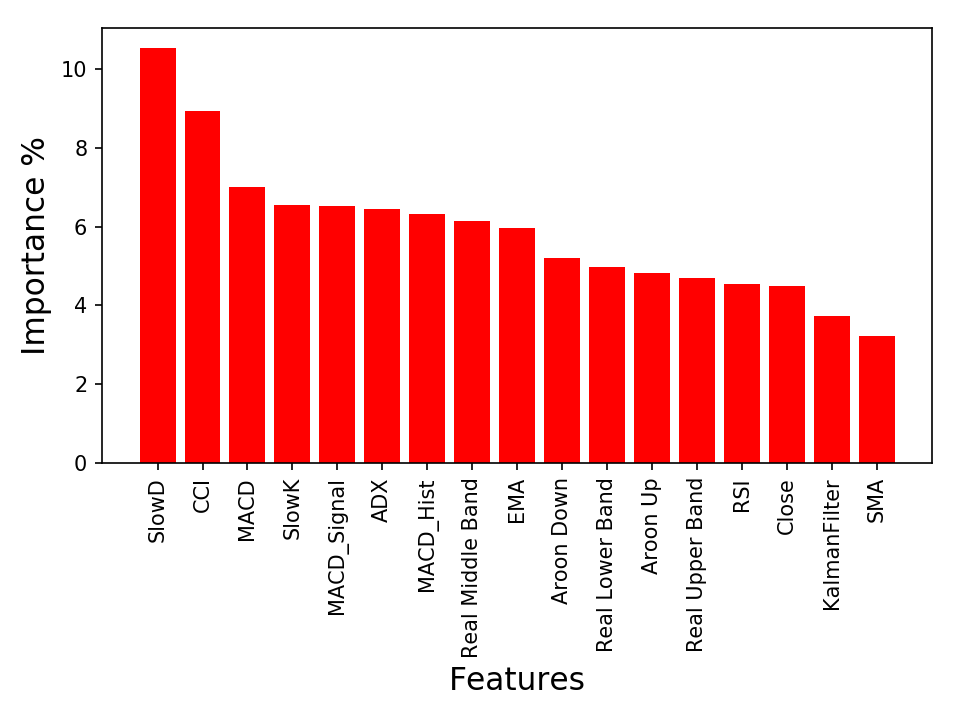

In [26]:
plt.bar(x, feature_importances.importance*100, color='r')
plt.xlabel('Features', fontsize=15)
plt.ylabel('Importance %', fontsize=15)
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

In [29]:
grid_summary = pd.read_csv('sp500_grid_results.csv')

In [30]:
grid_summary.head()

,Unnamed: 0,Unnamed: 0.1,Ticker,Model,Accuracy,F1,ROC
0,0,0,MMM,SVC,0.595506,0.694915,0.579027
1,1,1,MMM,RandomForestClassifier,0.573034,0.648148,0.562817
2,0,0,ABT,SVC,0.550562,0.565217,0.554872
3,1,1,ABT,RandomForestClassifier,0.516854,0.565657,0.510769
4,0,0,ABBV,SVC,0.483146,0.640625,0.498483


In [31]:
grid_summary = grid_summary.drop(['Unnamed: 0','Unnamed: 0.1'], axis=1)

KeyError: False

In [32]:
grid_summary.describe()

,Accuracy,F1,ROC
count,1010.000000,1010.000000,1010.000000
mean,0.520009,0.581651,0.514253
std,0.052459,0.081761,0.048687
min,0.325843,0.253521,0.325253
25%,0.488889,0.537634,0.485911
50%,0.516854,0.584906,0.511711
75%,0.555556,0.638655,0.544736
max,0.700000,0.770370,0.683704


In [34]:
grid_summary.loc[grid_summary['Accuracy'].idxmax()]   #Top1

Ticker                        NFLX
Model       RandomForestClassifier
Accuracy                       0.7
F1                        0.752294
ROC                       0.683704
Name: 669, dtype: object

In [35]:
grid_summary.loc[grid_summary['F1'].idxmax()]

Ticker                         GPN
Model       RandomForestClassifier
Accuracy                  0.651685
F1                         0.77037
ROC                       0.567196
Name: 437, dtype: object

In [36]:
grid_summary.loc[grid_summary['ROC'].idxmax()]   

Ticker                        NFLX
Model       RandomForestClassifier
Accuracy                       0.7
F1                        0.752294
ROC                       0.683704
Name: 669, dtype: object

In [109]:
grid_summary.max()

Ticker          ZION
Model            SVC
Accuracy         0.7
F1           0.77037
ROC         0.683704
dtype: object

In [107]:
grid_summary.quantile(.90)

Accuracy    0.584732
F1          0.678292
ROC         0.576771
Name: 0.9, dtype: float64

In [104]:
grid_summary.nlargest(10, 'Accuracy')  #Top10

,Ticker,Model,Accuracy,F1,ROC
669,NFLX,RandomForestClassifier,0.700000,0.752294,0.683704
234,CFG,SVC,0.685393,0.754386,0.658411
813,ROST,RandomForestClassifier,0.666667,0.732143,0.650075
253,CMA,RandomForestClassifier,0.662921,0.761905,0.598128
442,GWW,SVC,0.662921,0.634146,0.660588
892,TMK,SVC,0.655556,0.666667,0.655369
94,AON,SVC,0.651685,0.710280,0.635655
211,SCHW,RandomForestClassifier,0.651685,0.720721,0.627513
394,FISV,SVC,0.651685,0.699029,0.642347
437,GPN,RandomForestClassifier,0.651685,0.770370,0.567196


In [105]:
grid_summary.nlargest(20, 'F1')

,Ticker,Model,Accuracy,F1,ROC
437,GPN,RandomForestClassifier,0.651685,0.770370,0.567196
253,CMA,RandomForestClassifier,0.662921,0.761905,0.598128
234,CFG,SVC,0.685393,0.754386,0.658411
669,NFLX,RandomForestClassifier,0.700000,0.752294,0.683704
646,MCO,SVC,0.600000,0.750000,0.500000
490,IDXX,SVC,0.617978,0.746269,0.534392
378,FFIV,SVC,0.617978,0.742424,0.523575
83,APH,RandomForestClassifier,0.640449,0.741935,0.595717
954,V,SVC,0.588889,0.741259,0.500000
36,ARE,SVC,0.606742,0.740741,0.551282


In [41]:
grid_summary.nlargest(10, 'ROC')

,Ticker,Model,Accuracy,F1,ROC
669,NFLX,RandomForestClassifier,0.700000,0.752294,0.683704
442,GWW,SVC,0.662921,0.634146,0.660588
234,CFG,SVC,0.685393,0.754386,0.658411
892,TMK,SVC,0.655556,0.666667,0.655369
541,KSU,RandomForestClassifier,0.651685,0.673684,0.650407
813,ROST,RandomForestClassifier,0.666667,0.732143,0.650075
242,CMS,SVC,0.640449,0.644444,0.645325
756,PX,SVC,0.633333,0.592593,0.642857
394,FISV,SVC,0.651685,0.699029,0.642347
573,LUK,RandomForestClassifier,0.651685,0.586667,0.642051
